# Example Code
## Read a FITS file and make some plots

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Astropy import statements
name='mangaHIall.fits'
hdul = fits.open(name)

In [4]:
#Look at what's in the fits file. The table is in HDU = 1
hdul.info()

Filename: mangaHIall.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (1896,)   uint8   
  1  MANGAHIALL - HI-MANGA DATA FROM AGBT16A_95 OBSERVING    1 BinTableHDU     65   331R x 26C   [10A, 9A, D, D, I, 12A, E, E, E, E, E, E, E, I, E, I, I, I, I, I, E, E, E, E, E, E]   


In [5]:
#Read the data into an table. 
data=hdul[1].data

In [6]:
#Get information on columns
cols = hdul[1].columns
cols.info()

name:
    ['plateifu', 'mangaid', 'objra', 'objdec', 'vopt', 'session', 'Exp', 'rms', 'logHIlim200kms', 'peak', 'snr', 'FHI', 'logMHI', 'VHI', 'eV', 'WM50', 'WP50', 'WP20', 'W2P50', 'WF50', 'Pr', 'Pl', 'ar', 'br', 'al', 'bl']
format:
    ['10A', '9A', 'D', 'D', 'I', '12A', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'E', 'I', 'I', 'I', 'I', 'I', 'E', 'E', 'E', 'E', 'E', 'E']
unit:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
null:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
bscale:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
bzero:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
disp:
    ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
start:
    ['', '', '', '', '', '', '', '', '', 

Text(0, 0.5, 'Number')

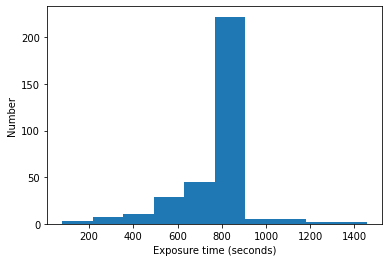

In [11]:
#Pick out a column of interest and make a quick histogram
variable=data['Exp']
plt.hist(variable)
plt.xlabel('Exposure time (seconds)')
plt.ylabel('Number')

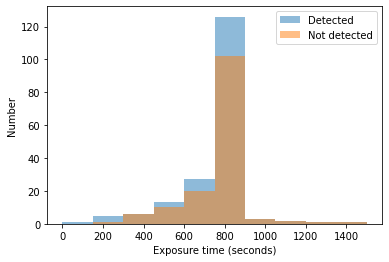

In [14]:
#Slice data on values in a column and make two new histograms
detected=data[data['logMHI']>0]
notdetected=data[data['logMHI']<0]
plt.hist(detected['Exp'],alpha=0.5,label='Detected',range=[0,1500])
plt.hist(notdetected['Exp'],alpha=0.5,label='Not detected',range=[0,1500])
# Need to set range to plot two histograms to compare. Otherwise will not match up bins. 
#All options: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.xlabel('Exposure time (seconds)')
plt.ylabel('Number')
plt.legend()

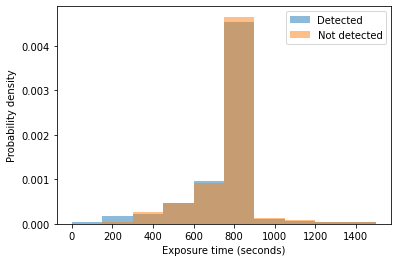

In [16]:
#If sample sizes have different numbers it's useful to make normalized histograms
plt.hist(detected['Exp'],alpha=0.5,label='Detected',range=[0,1500],density=True)
plt.hist(notdetected['Exp'],alpha=0.5,label='Not detected',range=[0,1500],density=True)
plt.xlabel('Exposure time (seconds)')
plt.ylabel('Probability density')
plt.legend()

Text(0, 0.5, 'rms noise')

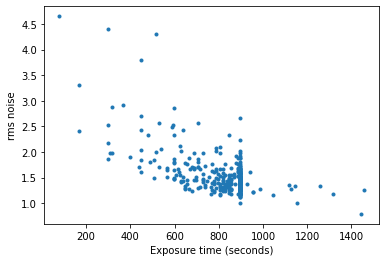

In [18]:
#Make a scatter plot
plt.plot(data['Exp'],data['rms'],'.')
plt.xlabel('Exposure time (seconds)')
plt.ylabel('rms noise')

In [19]:
#Put the data into a Panda data frame (if you prefer Pandas, which has some nice uses for table work)
#https://pandas.pydata.org/docs/index.html
df=pd.DataFrame(data)